<a href="https://colab.research.google.com/github/thinnguyenqb/KHDLUD-Nhom05/blob/master/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://drive.google.com/uc?export=view&id=1KGNBBRRabYfB1zOj94zVtKtVnx2vFB6f)

# Giới thiệu nhóm

| MSSV | Full Name | ID Github |
| ---- | ---- | -------- |
| 1612835 | Bùi Trọng Xuyến | btxuyenhcmus |
| 18120563 | Hứa Phú Thành | huasen07 |
| 1712391 | Trần Bảo Duy | duytran1999 |
| 1712787 | Nguyễn Văn Thìn | thinnguyenqb |

[https://github.com/thinnguyenqb/KHDLUD-Nhom05.git](https://github.com/thinnguyenqb/KHDLUD-Nhom05.git)

![Footer-logo](https://drive.google.com/uc?export=view&id=17aEQ6johMz7h-OV_zfsxx3F11NcsWXAN)

# Giới thiệu bài toán

![banner](https://drive.google.com/uc?export=view&id=1pL0j1Nakl2rwa0CI06uwB2ylyuqOvwka)

## Sơ lược về cuộc thi

`Walmart` là một trong các chợ thương mại điện tử lớn hàng đầu ở USA, với lượng `volume` sản phẩm bán ra cực kì lớn của mình. Cuộc thi được đưa ra với mục tiêu thách thức các team sử dụng các thuật toán nâng cao để đưa ra được dự đoán chính xác nhất về lượng hàng hóa bán ra trong một chuỗi thời gian tương lai tiếp theo.

`M5` bắt đầu vào ngày `02/03/2020` và kết thúc ngày `30/06/2020`. Tổ chức trên nền tảng công nghệ `Kaggle`.

`M5` tổ chức thành 2 cuộc thi nhỏ chạy song song trên `kaggle` và cùng sử dụng chung một  bộ dữ liệu.

- Cuộc thi đầu tiên có tên gọi là `M5 Forecasting Competition – Accuracy` với mục tiêu là dự đoán doanh số bán hàng trong 28 ngày kế tiếp cho các sản phẩm tại các cửa hàng Walmart. (*Cụ thể hơn là dự đoán số lượng bán ra của một mặt hàng trong một ngày của 28 ngày kế tiếp => Từ đó cửa hàng sẽ biết được số lượng hàng nhập vào để bán, tránh được tồn kho*)
- Cuộc thi thứ hai có tên gọi là `M5 Forecasting Competition – Uncertainty` với mục tiêu là dự đoán xác xuất.

Cuộc thi kết thúc với sự tham gia của `5.558` teams

## Dữ liệu đầu vào

- `calendar.csv`
- `sales_train_validation.csv`
- `sell_prices.csv`
- `sales_train_evaluation.csv`

## Dữ liệu đầu ra

- `submission.csv`

# Tập dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#!find /content/drive
%cd /content/drive/MyDrive/KHDLUD/input

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/162NSyrwjXoKLVN79CInPyD8lzPAUzNdG/KHDLUD/input


In [ ]:
!ls

calendar.csv		   sales_train_evaluation.csv  sell_prices.csv
data_final.pkl		   sales_train_validation.csv
original_lag_win_data.pkl  sample_submission.csv


![Dataset-hir](https://drive.google.com/uc?export=view&id=1l2ouDSWCf2TjPMCIVANuEP7gxvvDCgb9)

Tập dữ liệu `M5`, được cung cấp rộng rãi bởi `Walmart`, liên quan đến doanh số bán hàng đơn vị của các sản phẩm khác nhau được bán ở Hoa Kỳ, được tổ chức dưới dạng chuỗi thời gian được nhóm lại. Cụ thể hơn, tập dữ liệu liên quan đến doanh số bán hàng theo đơn vị của `3.049 sản phẩm`, được phân loại thành `3 danh mục` sản phẩm (Sở thích, Thực phẩm và Gia dụng) và `7 phòng ban sản phẩm`, trong đó các danh mục nêu trên được tách riêng. Các sản phẩm được bán trên mười cửa hàng, đặt tại `3 Bang` (California, Texas và Wisconsin).

In [ ]:
import pandas as pd

## Calendar.csv

- `data`: Ngày ở địng dạng y-m-d
- `wm_yr_wk`: id tuần mà ngày thuộc về
- `weekday`: Loại ngày trong tuần (Monday, ….)
- `wday`: Id của ngày trong tuần bắt đầu từ thứ 7
- `month`: tháng
- `year`: năm
- `event_name_1`: Nếu ngày có sự kiện, thì tên sự kiện 
- `event_type_1`:Nếu ngày có sự kiện, thì loại sự kiện
- `event_name_2`: Nếu ngày có sự kiện thứ hai, thì tên sự kiện
- `event_type_2`: Nếu ngày có sự kiện thứ hai, thì loại sự kiện
- `snap_CA,snap_TX, snap_WI`: giá trị nhị phân cho biết cửa hàng CA,TX,WI có cho phép mua SNAP^3 vào ngày được cho phép hay không ? Nếu cho phép là 1.

In [ ]:
calendar = pd.read_csv('calendar.csv')
calendar.head(5)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


## Sell_prices.csv

- `store_id`: mã cửa hàng
- `item_id`: mã mặt hàng
- `wm_yr_wk`: id của tuần chứa ngày
- `sell_price`: giá bán

In [ ]:
sell_prices = pd.read_csv('sell_prices.csv')
sell_prices.head(5)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


## Sales_train_evaluation.csv / sales_train_validation.csv

- `id`: mã
- `item_id`: mã sản phẩm
- `dept_id`: mã khu vực/ vùng
- `cat_id`: mã loại
- `store_id`: mã cửa hàng
- `state_id`: mã tiểu bang
- `[d_1,d_1913]`: dữ liệu bán hàng

In [ ]:
sales_train_evaluation = pd.read_csv('sales_train_evaluation.csv')
sales_train_evaluation.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [ ]:
sales_train_evaluation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


## Sample_submission.csv

In [ ]:
sample_submission_ = pd.read_csv('sample_submission.csv')
sample_submission_.head(5)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Đánh giá

## Forecasting horizon

Cả 2 cuộc thi dự đoán điểm và dự đoán sác xuất đều có chung một tham số `h=28 days` (4 weeks ahead).

Đầu tiên, các phép đo hiệu suất được tính toán riêng biệt cho từng chuỗi bằng cách lấy trung bình các giá trị của chúng trên toàn bộ `forecasting horizon` và sau đó được tính trung bình lại trên `mỗi serices` theo kiểu có trọng số  để thu được điểm số cuối cùng.

## Point forecasts

Độ chính xác của các dự báo điểm sẽ được đánh giá bằng cách sử dụng `Root Mean Squared Scaled Error (RMSSE)`, là một biến thể của `well-known Mean Absolute Scaled Error (MASE)` nổi tiếng được đề xuất bởi `Hyndman và Koehler (2006)`. Số đo được tính cho từng series như sau:

$$RMSSE = \sqrt{\frac{1}{h}\frac{\displaystyle\sum_{t=n+1}^{n+h} (Y_{t} - \hat{Y}_{t})^2}{\frac{1}{n-1}\displaystyle\sum_{t=2}^{n}(Y_{t} - Y_{t-1})^2}}$$

Với,
- $Y_{t}$ là giá trị thật của `series` đã kiểm tra tại thời điểm t.
- $\hat{Y}_{t}$ là giá trị dự đoán.
- $n$ là kích thước của tập training (số lượng quan sát lịch sử).
- $h$ tham số `Forecasting horizon`

Sau khi đã ước tính cho `42840 series` mối đội tham gia sẽ được sếp hạng theo số điểm `Weighted RMSSE (WRMSSE)`, công thức sẽ là:

$$WRMSSE = \displaystyle\sum_{i=1}^{42,840} w_{i}*RMSSE$$

Với, $w_{i}$ là trọng số của series thứ $i$.

Độ lỗi `WRMSSE` càng thấp thì tính chính xác của thuật toán áp dụng càng cao.

# Hướng giải quyết - `LightGBM Regressor (tuya)`

`LightGBM` có kết quả `score` là `0.67749 (private score)`. Trong tổng số `5.558 đội` tham gia cuộc thi thì với số điểm này và vị trí thứ `458` hướng giải quyết này lọt vào `top 9% trên bảng private leaderboard`.
![tuya-kaggle](https://drive.google.com/uc?export=view&id=1AQyGcWC44Sd-pE6XlINApXohYCBNHJGQ)

So sánh `LightGBM` với các thuật toán khác với dùng một input đầu vào,

![comparasion](https://drive.google.com/uc?export=view&id=1d__XDCMRvmY_d2kMzsUxMXI4RKpZ8hL4)
![comparasion2](https://drive.google.com/uc?export=view&id=1UKKa7lIMNXJJ_0rrpysArlmXIdADK9mG)

Quan sát các lần submit của các thuật toán, thì dễ dàng nhận ra `LightGBM` cho kết quả tốt nhất.

## Feature Engineering and Data Preprocessing

In [ ]:
!pip install downcast

In [ ]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from downcast import reduce
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

- Replace 'NaN' values by 'no_event' in event columns

In [ ]:
cat=['event_name_1','event_type_1','event_name_2','event_type_2']
for i in cat:
  calendar[i].fillna('no_event',inplace=True)

- Adding feature 'month_day' which tells day of the month

In [ ]:
m=calendar["date"].tolist()
m=[i.split("-")[2] for i in m]
calendar["month_day"]=m
calendar['month_day']=calendar['month_day'].astype(np.int8)

- Adding feature 'month_week_number' which tells which week of the month

In [ ]:
calendar['month_week_number']=(calendar['month_day']-1) // 7 + 1 
calendar['month_week_number']=calendar['month_week_number'].astype(np.int8)

- Adding feature 'events_per_day' which tells us number of events on particular day

In [ ]:
f=lambda x: 0 if x=='no_event' else 1
calendar['events_per_day']=calendar['event_type_1'].map(f) 
index=calendar.index 
indices=index[calendar['event_type_2']!='no_event'].tolist()
for i in indices:
  calendar['events_per_day'][i]+=1
calendar['events_per_day']=calendar['events_per_day'].astype(np.int8)

In [ ]:
calendar=reduce(calendar)

In [ ]:
calendar.head(3)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,month_day,month_week_number,events_per_day
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0,1,29,5,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0,1,30,5,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0,0,31,5,0


In [ ]:
sales_train_evaluation=reduce(sales_train_evaluation)

In [ ]:
sell_prices=reduce(sell_prices)

In [ ]:
calendar['date'].nunique()

1969

- No of days data present is 1969

In [ ]:
sales_train_evaluation[['id','item_id','dept_id','cat_id','store_id','state_id']].nunique()

id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
state_id        3
dtype: int64

### Melting (thay đổi)

- To make analysis of data in table easier we can reshape the data into a more computer-friendly form using pandas in Python. pandas.melt() is one of the function to do so
- pandas.melt() unpivots a DataFrame from wide format to long format.
- melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables while all other columns considered measured variables are unpivoted to the row axis leaving just two non-identifier columns variable and value.

In [ ]:
df = pd.melt(sales_train_evaluation,id_vars=sales_train_evaluation.columns.values[:6],var_name="d",value_name="demand")
df["demand"] = df["demand"].astype("float32")
df = df.merge(calendar, on='d', copy = False)
df = df.merge(sell_prices, on=[ "item_id","store_id", "wm_yr_wk"],copy = False)

In [ ]:
df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,month_day,month_week_number,events_per_day,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0,1,29,5,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0,1,29,5,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,no_event,no_event,no_event,no_event,0,0,0,1,29,5,0,NaN


**Cột `sell_price` chứa rất nhiều biến Nan nên điền vào chỗ Nan bằng giá trị mean.**

In [ ]:
df['sell_price']=df['sell_price'].fillna(df.groupby('id')['sell_price'].transform('mean'))

In [ ]:
df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,is_weekend,month_day,month_week_number,events_per_day,sell_price
32441360,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1065,0,2013-12-28,11349,Saturday,1,12,2013,no_event,no_event,no_event,no_event,0,0,0,1,28,4,0,8.257812
32441361,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1065,0,2013-12-28,11349,Saturday,1,12,2013,no_event,no_event,no_event,no_event,0,0,0,1,28,4,0,3.970703
32441362,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1065,0,2013-12-28,11349,Saturday,1,12,2013,no_event,no_event,no_event,no_event,0,0,0,1,28,4,0,2.970703


**Lược bớt dữ liệu trước ngày 1-1-2014 = d_1069 trước khi đưa vào xử lí (sử dụng biến wm_yr_wk với kiểu số để dễ xử lí)**

In [ ]:
df.drop(df.index[df["wm_yr_wk"]<11349], inplace=True)

In [ ]:
df=reduce(df)

### Lags (thay đổi)

- Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.
- Lag is expressed in a time unit & corresponds to the amount of data history we allow the model to use when making the prediction.
- Here we have applied Lags on 'demand' column.
- The maximum Lags taken is 70 days (Giảm xuống còn 28)

**Thay đổi biến lags**

In [ ]:
lags=[7,14,21,28,29,30]
for i in tqdm(lags):
  df['lag_'+str(i)]=df.groupby(['id'])['demand'].shift(i)
lags=[7,14,21,28]
for i in tqdm(lags):
  df["sell_price_lag_" + str(i)] = df.groupby(["id"])["sell_price"].shift(i)

100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


### Rolling-Mean (thay đổi)

- Rolling is a very useful operation for time series data.
- Rolling means creating a rolling window with a specified size & perform calculations on data in this window which of course rolls through data.
- Here we have computing Rolling-Mean on 'demand' column.
- The maximum Window size taken is 42

**Bổ sung một số Rolling và groupby mới**

In [ ]:
window=[7,14,21,28]
for i in tqdm(window):
  df['rolling_mean_'+str(i)] = df[["id","demand"]].groupby(['id'])['demand'].transform(lambda s: s.rolling(i).mean()).shift(1)
  df['rolling_mean_'+str(i)+"_lag_"+str(i)] = df[["id",'rolling_mean_'+str(i)]].groupby(["id"])['rolling_mean_'+str(i)].shift(i)

100%|██████████| 4/4 [1:15:55<00:00, 1138.83s/it]


In [ ]:
window=[7,30,90,180]
for i in tqdm(window):
  df['rolling_mean_' + str(i) + '_lag_28'] = df.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(i).mean())

100%|██████████| 4/4 [1:07:24<00:00, 1011.17s/it]


In [ ]:
window=[7,30]
for i in tqdm(window):
  df['rolling_std_' + str(i) + '_lag_28'] = df.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(i).std())

100%|██████████| 2/2 [32:47<00:00, 983.86s/it]


In [ ]:
df['rolling_skew_30_lag_28']  = df.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).skew())
df['rolling_kurt_30_lag_28']  = df.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).kurt())

In [ ]:
fill=['lag_7', 'lag_14', 'lag_21', 'lag_28', 'lag_29', 'lag_30',
       'sell_price_lag_7', 'sell_price_lag_14', 'sell_price_lag_21',
       'sell_price_lag_28', 'rolling_mean_7', 'rolling_mean_7_lag_7',
       'rolling_mean_14', 'rolling_mean_14_lag_14', 'rolling_mean_21',
       'rolling_mean_21_lag_21', 'rolling_mean_28', 'rolling_mean_28_lag_28',
       'rolling_mean_7_lag_28', 'rolling_mean_30_lag_28',
       'rolling_mean_90_lag_28', 'rolling_mean_180_lag_28',
       'rolling_std_7_lag_28', 'rolling_std_30_lag_28',
       'rolling_skew_30_lag_28', 'rolling_kurt_30_lag_28']
for i in fill:
  df[i]=df[i].fillna(0)

In [ ]:
df = reduce(df)

In [ ]:
with open('final_data.pkl','wb') as f:
     pickle.dump(df,f)

### Label-Encoding (giữ nguyên)

- Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.
- Machine learning algorithms can then decide in a better way on how those labels must be operated.
- It is an important pre-processing step for the structured dataset in supervised learning

In [ ]:
labelencoder=LabelEncoder() 
category=['event_name_1','event_type_1','event_name_2','event_type_2','id','item_id','dept_id','cat_id','store_id','state_id']
for i in tqdm(category):
  df[i]=labelencoder.fit_transform(df[i])

100%|██████████| 10/10 [01:00<00:00,  6.04s/it]


- Removed '_' from 'd' column values so that we can convert Categorical feature into Numerical feature easily

In [ ]:
l=[]
for i in df['d']:
  l.append(i.split('_')[1])
df['day']=l
df['day']=df['day'].astype(np.int16)

In [ ]:
df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d,demand,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,lag_7,sell_price_lag_7,lag_14,sell_price_lag_14,lag_21,sell_price_lag_21,lag_28,sell_price_lag_28,rolling_mean_7,rolling_mean_7_lag_7,rolling_mean_14,rolling_mean_14_lag_14,rolling_mean_21,rolling_mean_21_lag_21,rolling_mean_28,rolling_mean_28_lag_28,day,rolling_mean_7_lag_28,rolling_mean_30_lag_28,rolling_mean_90_lag_28,rolling_mean_180_lag_28,rolling_std_7_lag_28,rolling_std_30_lag_28,rolling_skew_30_lag_28,rolling_kurt_30_lag_28,week,isweekend
22384320,14380,1438,3,1,0,0,d_1114,0.0,2014-02-15,11403,Saturday,1,2,2014,30,4,2,2,0.0,1.0,1.0,3.970703,0.0,3.970703,1.0,3.970703,0.0,3.970703,0.0,3.970703,0.856934,0.285645,0.571289,0.285645,0.476074,0.333252,0.428467,0.357178,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1
22384341,14410,1441,3,1,0,0,d_1114,1.0,2014-02-15,11403,Saturday,1,2,2014,30,4,2,2,0.0,1.0,1.0,3.080078,0.0,3.080078,3.0,3.080078,4.0,3.080078,2.0,3.080078,1.857422,2.285156,2.072266,2.427734,2.000000,1.952148,2.250000,2.107422,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1
22384348,14420,1442,3,1,0,0,d_1114,0.0,2014-02-15,11403,Saturday,1,2,2014,30,4,2,2,0.0,1.0,1.0,1.000000,0.0,1.000000,5.0,1.000000,4.0,1.000000,2.0,1.000000,1.286133,0.714355,1.000000,1.286133,0.952148,1.047852,1.142578,0.464355,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,1


In [ ]:
df=reduce(df)

In [ ]:
with open('my_new_data_1.pkl','wb') as f:
     pickle.dump(df,f)

### Droping duplicate columns (giữ nguyên)

- Since 'weekday' is represented by 'wday' & 'd' is represented by 'day'.
- We already have 'month','year' thats why 'date' is also duplicate column.

In [ ]:
df=df.drop(['d','date','weekday'],axis=1)

In [ ]:
df=reduce(df)

In [ ]:
features = ['item_id', 'cat_id', 'state_id', 'year', 'month', 'day', 'wday' , 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 
            'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'lag_7', 'lag_14', 'is_weekend','events_per_day','month_week_number','month_day',
       'lag_21', 'lag_28', 'lag_29', 'lag_30', 'sell_price_lag_7',
       'sell_price_lag_14', 'sell_price_lag_21', 'sell_price_lag_28',
       'rolling_mean_7', 'rolling_mean_7_lag_7', 'rolling_mean_14',
       'rolling_mean_14_lag_14', 'rolling_mean_21', 'rolling_mean_21_lag_21',
       'rolling_mean_28', 'rolling_mean_28_lag_28', 'rolling_mean_7_lag_28',
       'rolling_mean_30_lag_28', 'rolling_mean_90_lag_28',
       'rolling_mean_180_lag_28', 'rolling_std_7_lag_28',
       'rolling_std_30_lag_28', 'rolling_skew_30_lag_28',
       'rolling_kurt_30_lag_28','demand'
        ]
df = df[features]

## ML Models

* Divide data into Train/Test/Validation 

  * Train: Till d_1885

  * Validation: From d_1886 to d_1914

  * Test: From d_1914 to d_1941

In [ ]:
l=[]
for i in range(1886,1914):
  l.append(i)

x_train=df.loc[df['day']<=1885]
x_valid=df.loc[df['day'].isin(l)]
x_test=df.loc[df['day']>=1914]

y_train=x_train['demand']
y_valid=x_valid['demand']
y_test=x_test['demand']

#x_train=x_train.drop(['demand'],axis=1)
#x_valid=x_valid.drop(['demand'],axis=1)
x_test=x_test.drop(['demand'],axis=1)

print("x_train {}".format(x_train.shape),"  y_train {}".format(y_train.shape))
print("\nx_valid {}".format(x_valid.shape),"  y_valid {}".format(y_valid.shape))
print("\nx_test {}".format(x_test.shape),"  y_test {}".format(y_test.shape))

x_train (23355340, 43)   y_train (23355340,)

x_valid (853720, 43)   y_valid (853720,)

x_test (853720, 43)   y_test (853720,)


In [ ]:
del df
gc.collect()

## LightGBM Regressor

`LightGBM` là một khung tăng cường độ dốc gradient dựa trên thuật toán cây phân cấp.

`LightGBM` phát triển cây theo chiều dọc trong khi các thuật toán cây khác phát triển theo chiều ngang. Nghĩa là LightGBM sẽ phát triển theo nút lá, còn các thuật toán sẽ phát triển hết các node trên các cấp. Nó sẽ chọn lá với delta loss lớn nhất để phát triển, khi phát triển như vậy thì leaf-wise sẽ giảm thiểu tổn thất nhiều hơn so với level-wise.

Cây ở LGBM xây dựng theo nhiều lần và mỗi cây mới được sử dụng để sửa “lỗi” 
của các cây trước đó. Như vậy sẽ nhanh chóng và mạnh mẽ, tuy nhiên cũng dễ bị over-fitting.

![leaf-wise](https://drive.google.com/uc?export=view&id=1gW5hO0yp0l_-AAFuPQh9Bh52t3cmnFvg)
![level-wise](https://drive.google.com/uc?export=view&id=1XxRzXrnyCYGlAlSarKlVxQp2-RFGWBOy)

`LightGBM` bắt đầu bằng từ light bởi vì tốc độ của nó rất nhanh. Kèm theo đó lightGBM có thể xử lý được dữ liệu lớn mà chỉ tiêu tốn ít bộ nhớ (RAM) để chạy nó. Và một lý do nữa mà khiến nó phổ biến là vì thuật toán tập trung vào sự chính xác của kết quả.

Và điều đặt biệt lưu ý là không nên sử dụng LightGBM với lượng dữ liệu nhỏ, vì lightGBM rất dễ xảy ra hiện tượng overfiting với các tập dữ liệu có kích thước nhỏ. Dùng cho data hơn 10,000 dòng.

LightGBM có hơn 100 tham số.

### Control parameters

- `max_depth`: độ sâu lớn nhất của cây, tham số này giúm xử lý vấn đề overfiting. Bất khi nào bạn thấy model của bạn bị overfiting hãy giảm tham số này.
- `min_data_in_leaf`: số lượng dữ liệu nhỏ nhất mà một lá có thể có. Nó cũng được dùng để giải quyết overfiting.
- `feature_fraction`: dùng để tăng cường. Ví dụ: 0.8 nghĩa là LightGBM sẽ chọn ra 80% các tham số ngẫu nhiên cho mỗi lần build tree.
- `bagging_fraction`: dùng để chỉ định phần dữ liệu sẽ được sử dụng cho mỗi lần lặp lại và thường được sử dụng để tăng tốc quá trình đào tạo.
- `early_stopping_round`: Tham số này thì dùng để tăng tốc độ phân tích cho mô hình. Mô hình sẽ ngừng đào tạo nếu một chỉ số của một dữ liệu không cải thiện trong số vòng của tham số Early_stopping_round đã đặt, giúp không lặp lại quá trình đào tạo nhiều lần mà không có kết quả cải thiện.
- `lambda`: lambda chỉ định chính quy hóa. Giá trị nằm trong khoảng từ 0 đến 1. Nhằm tránh Overfitting.
- `min_gain_to_split`: dùng để xác định mức tăng tối thiểu để thực hiện phân tách nhánh. Nó có thể được sử dụng để kiểm soát số lượng phân tách mà có hiệu quả trong cây.
- `max_cat_group`: Khi số lượng phân loại là lớn, việc tìm kiếm điểm phân tách trên đó dễ gây ra hiện tượng over-fitting. Vì vậy, LightGBM hợp nhất chúng thành các nhóm ‘max_cat_group’ và tìm các điểm phân tách trên ranh giới nhóm, mặc định: 64.

### Core parameters

- `Task`: Tham số để chỉ định tác vụ bạn muốn thực hiện trên dữ liệu, có thể là huấn luyện hoặc dự đoán.
- `application`: Đây là tham số quan trọng nhất và chỉ định ứng dụng cho mô hình của bạn, tức là bài toán hồi quy hay bài toán phân loại. LightGBM theo mặc định sẽ coi mô hình là một mô hình hồi quy.
- `boosting`: xác định loại thuật toán bạn muốn chạy, mặc định là: gdbt
- `num_boost_round`: Số lần lặp lại thúc đẩy, thường là 100 trở lên.
- `learning_rate`: Điều này quyết định tác động của mỗi cây đến kết quả cuối cùng. GBM hoạt động bằng cách bắt đầu với ước tính ban đầu được cập nhật bằng cách sử dụng đầu ra của mỗi cây. Tham số này kiểm soát mức độ của thay đổi này trong các ước tính. Giá trị thường là: 0,1, 0,001, 0,003…
- `num_leaves`: số lá trong toàn bộ cây, mặc định: 31
- `device`: CPU hoặc GPU.


### Train

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
def rmse(pred,value):
    return np.sqrt(((pred-value)**2).mean())

In [ ]:
%%time
learning_rate=0.034 
max_depth=66
num_leaves=224
lgb=LGBMRegressor(learning_rate=learning_rate,max_depth=max_depth,num_leaves=num_leaves, boosting_type = 'gbdt',
    metric =  'rmse',
    objective = 'regression',
    n_jobs = -1,
    seed = 236, 
    num_boost_round = 150)
lgb.fit(x_train,y_train)
y_pred=lgb.predict(x_valid)
print("learning_rate: {}".format(learning_rate),"  max_depth: {}".format(max_depth),"  num_leaves: {}".format(num_leaves),"  Rmse: {}".format(rmse(y_pred,y_valid)))

learning_rate: 0.034   max_depth: 66   num_leaves: 224   Rmse: 2.027787063897101
CPU times: user 24min 42s, sys: 8.7 s, total: 24min 50s
Wall time: 6min 43s


In [ ]:
with open('final_model.lgb','wb') as f:
     pickle.dump(lgb,f)

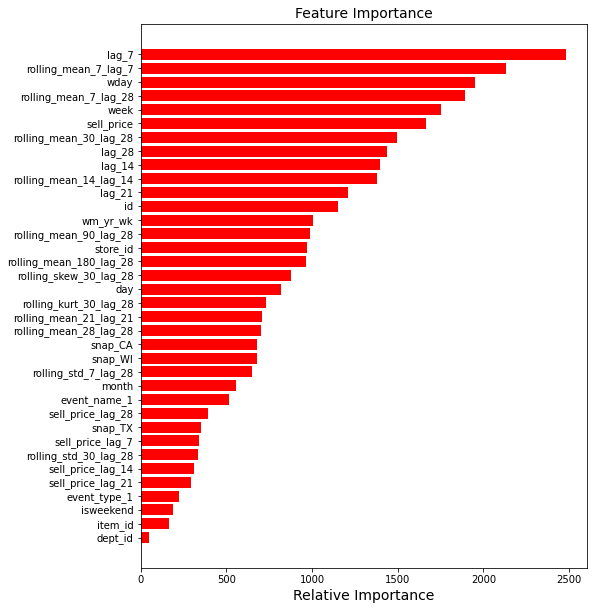

In [ ]:
features=x_train.columns
imp=lgb.feature_importances_
indices=(np.argsort(imp))[5:]
plt.figure(figsize=(8,10))
plt.title('Feature Importance',fontsize=14)
plt.barh(range(len(indices)),imp[indices],color='r')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=14)
plt.show()

In [ ]:
sales_train_eval=pd.read_csv('sales_train_evaluation.csv')

In [ ]:
s1=pd.DataFrame()
s2=pd.DataFrame()
s1['id']=sales_train_eval['id'] 
j=1
for i in range(1914,1942):
  s1['F'+str(j)]=lgb.predict(x_test[x_test['day']==(i)]) 
  j+=1
s1["id"]=s1["id"].apply(lambda x: x.replace('evaluation','validation'))
s2=s1.copy()
s2["id"]=s1["id"].apply(lambda x: x.replace('validation','evaluation'))
submit_LGBM_Regressor=pd.concat([s1,s2]).reset_index().drop(['index'],axis=1)

In [ ]:
submit_LGBM_Regressor.head()

In [ ]:
submit_LGBM_Regressor.to_csv("final_model.csv",index=False)

## Submit Kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions submit -c m5-forecasting-accuracy -f final_model.csv -m ""

100% 33.1M/33.1M [00:07<00:00, 4.35MB/s]
Successfully submitted to M5 Forecasting - Accuracy

**Private Score:** Cải thiện tốt nhất hiện tại: 0.65359 (trước đó: 0.67380.)
Thời gian Feature ít hơn 2 tiếng.<br>
Điểm gốc tác giả: 0.67749